<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/Different_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import multivariate_normal as mvn

In [2]:
from google.colab import files
 
uploaded = files.upload()

Saving xor.csv to xor (1).csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['xor.csv']))
data.head()

# Dataset is now stored in a Pandas Dataframe

,x1,x2,y
0,1.907567,0.325865,0
1,2.270544,2.258817,0
2,2.323086,1.466601,0
3,0.752419,2.684305,0
4,2.837229,2.238149,0


In [4]:
X = data.to_numpy()

In [5]:
#X[:,-1]
set(X[:,-1])

{0.0, 1.0}

In [6]:
y = X[:,-1]

In [7]:
y.shape

(4000,)

In [8]:
  X = X[:,:-1]

In [9]:
X.shape

(4000, 2)

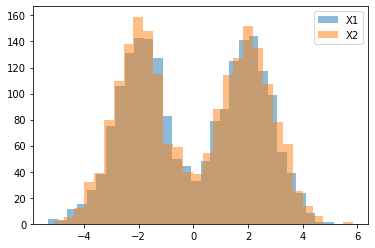

In [10]:
plt.figure()
plt.hist(X[y==1,0], label = "X1", alpha = 0.5 , bins = 30)
plt.hist(X[y==0,0], label ="X2" , alpha=0.5 , bins = 30)
plt.legend()

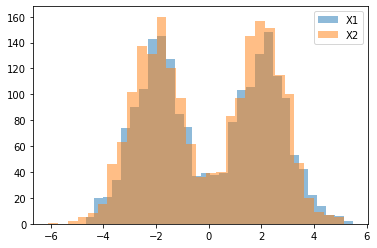

In [11]:
plt.figure()
plt.hist(X[y==1,1], label = "X1", alpha = 0.5 , bins = 30)
plt.hist(X[y==0,1], label ="X2" , alpha=0.5 , bins = 30)
plt.legend()

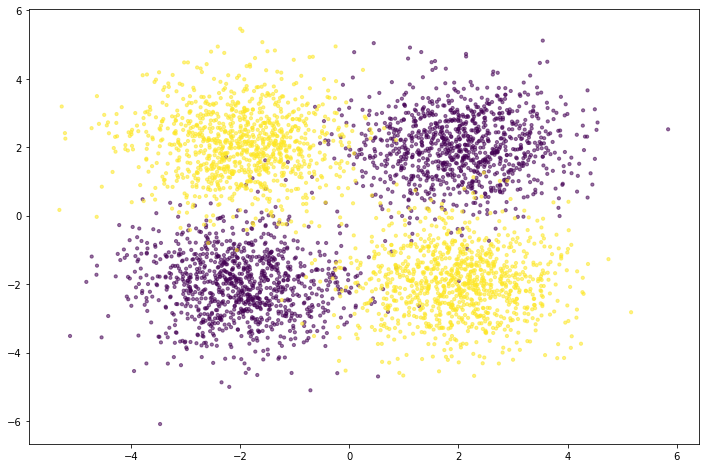

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,-1], c = y , alpha = 0.55 , s=10)

In [13]:
class GaussNB():
  #self is a variable that gives value to every method in the class

  def fit(self ,X ,y ,epsilon = 1e-3):
    self.likelyhoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[ y==k , :]
      self.likelyhoods[k] = {"mean" : X_k.mean(axis = 0), "cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k) / len(X)



  def predict(self, X):

    N , d = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelyhoods.items():
      #Bayes Theorem computation
      P_hat[:,k] = mvn.logpdf(X, l["mean"] , l["cov"]) + np.log(self.priors[k])

    return P_hat.argmax(axis=1)



In [14]:
def accuracy(y , y_hat):
  return np.mean(y==y_hat)

In [15]:
gnb = GaussNB()

In [16]:
gnb.fit(X,y)

In [17]:
y_hat = gnb.predict(X)

In [18]:
#Training Accuracy
accuracy(y , y_hat)

0.51275

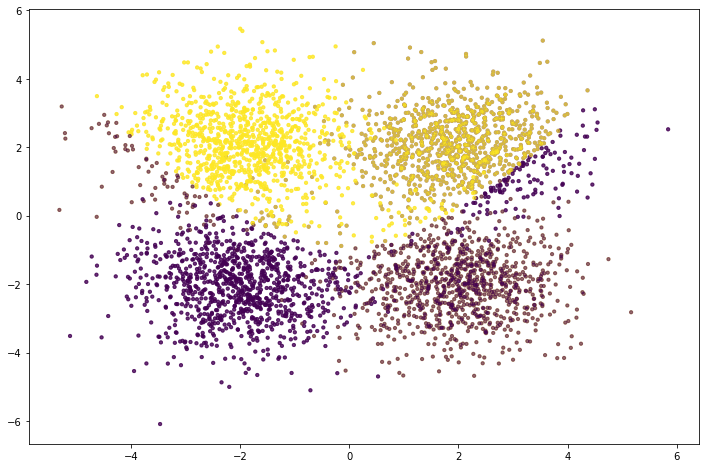

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,-1], c = y , alpha = 0.55 , s=10)
plt.scatter(X[:,0], X[:,-1], c = y_hat , alpha = 0.55 , s=10)

In [20]:
def coinflip(y):
  y_hat = np.zeros(len(y))
  for i in range(len(y)):
    flip = np.random.randn(1)
    if flip > 0:
      y_hat[1]=1


  return y_hat


In [21]:
y_hat = coinflip(y)

In [22]:
accuracy(y,y_hat)

0.49975